In [1]:
import numpy as np
import pandas as pd

In [2]:
data_path = "dataset/winequality-red.csv"
wine_df = pd.read_csv(data_path)
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
#print the shape
wine_df.shape

(1599, 12)

In [4]:
wine_df.count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

In [5]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
#check for missing values
wine_df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

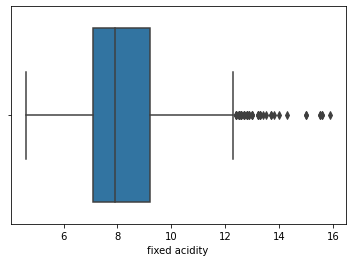

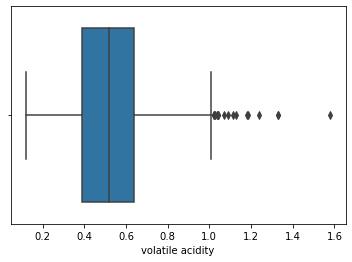

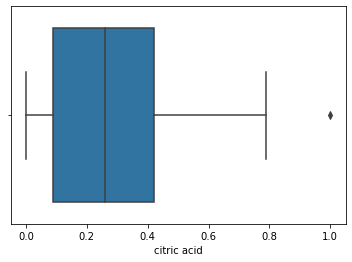

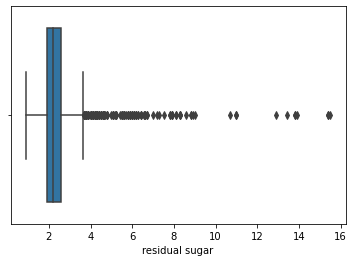

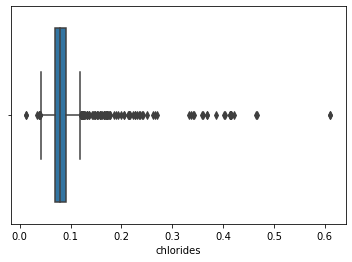

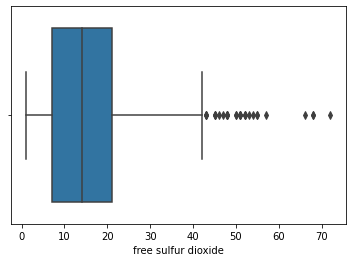

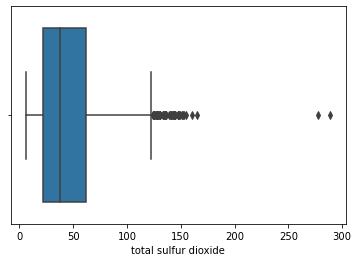

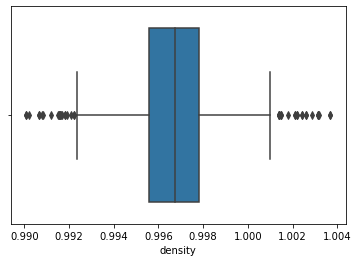

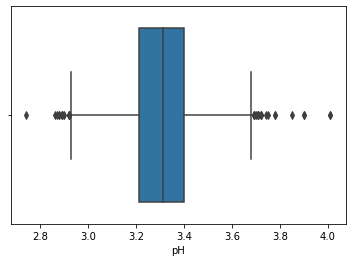

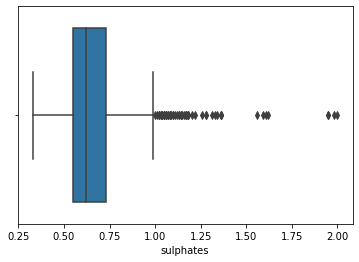

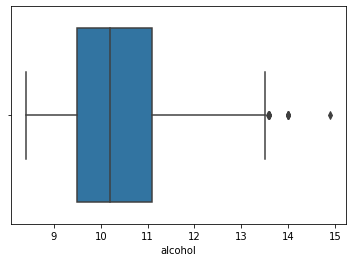

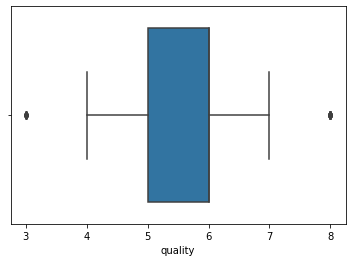

In [8]:
#draw box for all columns plot for checking distribution and outliers
import matplotlib.pyplot as plt
import seaborn as sns

for i in wine_df.columns:
    sns.boxplot(x=wine_df[i])
    plt.show()

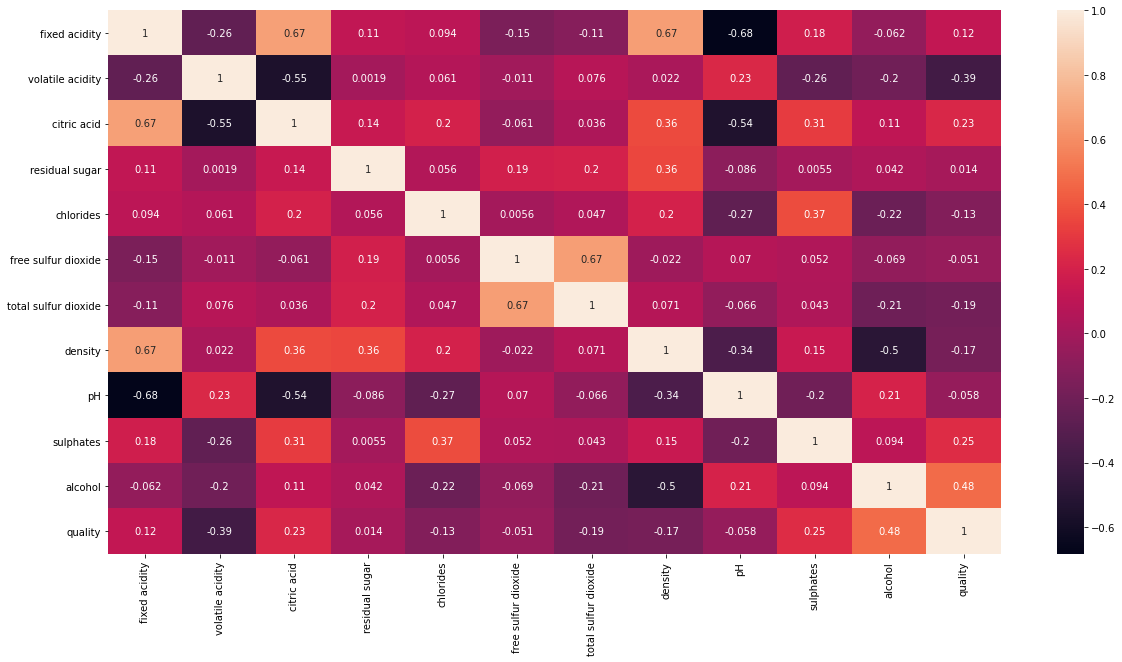

In [9]:
#plotting the heatmap
plt.figure(figsize=(20,10))
sns.heatmap(wine_df.corr(),annot=True)
plt.show()

In [10]:
#create a copy for visualization
wine_df_copy = wine_df.copy()

<AxesSubplot:xlabel='quality', ylabel='count'>

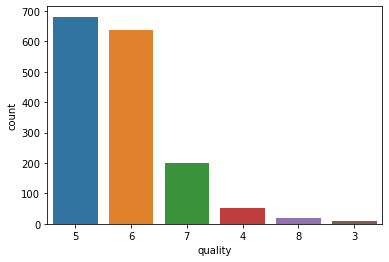

In [11]:
#plotting counts of category
wine_df_copy.quality = wine_df_copy.quality.map({0:'0',1:'1',2:'2',3:'3',4:'4',5:'5',6:'6',7:'7',8:'8',9:'9',10:'10'})
sns.countplot(x="quality", data=wine_df_copy)

<AxesSubplot:ylabel='Density'>

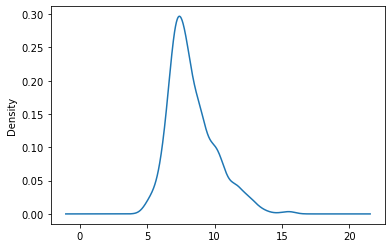

In [12]:
#draw kde plot
wine_df_copy['fixed acidity'].plot.kde()

<AxesSubplot:ylabel='Density'>

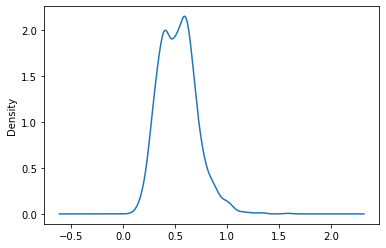

In [13]:
wine_df_copy['volatile acidity'].plot.kde()

Text(0.5, 1.0, 'fixed acidity vs quality')

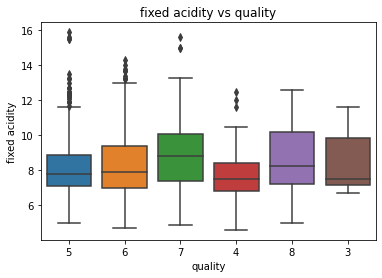

In [14]:
#compare quality with other columns
sns.boxplot(x=wine_df_copy['quality'], y=wine_df_copy['fixed acidity'])
plt.title("fixed acidity vs quality")

Text(0.5, 1.0, 'volatile acidity vs quality')

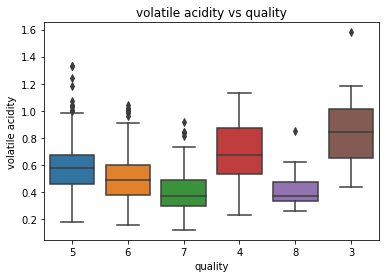

In [15]:
sns.boxplot(x=wine_df_copy['quality'], y=wine_df_copy['volatile acidity'])
plt.title("volatile acidity vs quality")

In [16]:
# dividing data into input and output
X = wine_df.drop('quality',axis=1)
y = wine_df['quality']

X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [17]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [18]:
#defining the keras model
#importing the required library
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [19]:
#defining the sequential model for binary classification
model = keras.Sequential()

In [20]:
model.add(layers.Dense(11,activation='relu',input_dim=11))
model.add(layers.Dense(5,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [21]:
#compile and fit the model
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X, y, validation_split=0.22, batch_size=100, epochs=20)
model.summary()

Epoch 1/20
13/13 [==============================] - 6s 238ms/step - loss: 9.2836 - accuracy: 0.0433 - val_loss: 3.3115 - val_accuracy: 0.1392
Epoch 2/20
13/13 [==============================] - 0s 9ms/step - loss: 2.5517 - accuracy: 0.2030 - val_loss: 1.6738 - val_accuracy: 0.3807
Epoch 3/20
13/13 [==============================] - 0s 7ms/step - loss: 1.5085 - accuracy: 0.4229 - val_loss: 1.4324 - val_accuracy: 0.4403
Epoch 4/20
13/13 [==============================] - 0s 9ms/step - loss: 1.3783 - accuracy: 0.4639 - val_loss: 1.3580 - val_accuracy: 0.4375
Epoch 5/20
13/13 [==============================] - 0s 9ms/step - loss: 1.2785 - accuracy: 0.5019 - val_loss: 1.3134 - val_accuracy: 0.4432
Epoch 6/20
13/13 [==============================] - 0s 9ms/step - loss: 1.2338 - accuracy: 0.5272 - val_loss: 1.2785 - val_accuracy: 0.4915
Epoch 7/20
13/13 [==============================] - 0s 9ms/step - loss: 1.2191 - accuracy: 0.5151 - val_loss: 1.2569 - val_accuracy: 0.5000
Epoch 8/20
13/13 [

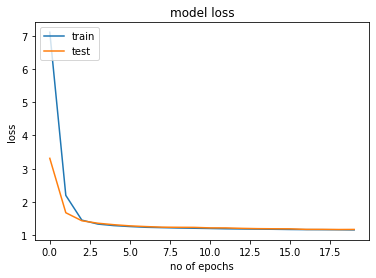

In [22]:
#plot loss vs epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('no of epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

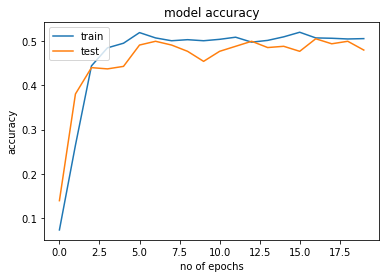

In [23]:
#plot accuracy vs epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('no of epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [24]:
import numpy as np
from numpy import array

#input for 11 features
Xnew = np.array([[7.9,0.6,0.06,1.6,0.069,15.0,59.0,0.9964,3.3,0.46,9.4]])

#Xnew = np.array([[8.3,0.655,0.12,2.3,0.083,15.0,113.0,0.9966,3.17,0.66,9.8]])

#convert into numpy array
Xnew = np.array(Xnew, dtype=np.float64)

#making the prediction
Ynew = model.predict(Xnew)

print(Ynew)

max_index_row = np.argmax(Ynew, axis=1)
print(max_index_row)

[[2.0768128e-05 1.1886165e-03 7.8650910e-06 1.9210037e-03 1.2928416e-02
  4.2703426e-01 4.2124426e-01 1.2867437e-01 6.1894185e-03 7.9093949e-04]]
[5]
